In [32]:
# Block 1: Setup and Initialization
import pandas as pd
import requests
import json

# Player list
players = ['Yaya Toure', 'Luis Suarez', 'Daniel Sturridge', 'Eden Hazard', 'Steven Gerrard', 'Adam Lallana',
           'Wayne Rooney', 'Emmanuel Adebayor', 'Olivier Giroud', 'Romelu Lukaku', 'Edin Dzeko',
           'Wilfried Bony', 'Jay Rodriguez', 'Christian Benteke', 'Rickie Lambert','Aaron Ramsey',
           'Oscar', 'Kevin Mirallas', 'Juan Mata', 'Raheem Sterling', 'Mesut Özil']

# Available and derived stats lists
available_stats_list = ['Goals', 'Assists', 'Appearances', 'Minutes Played', 'Yellow Cards', 'Red Cards',
                       'Shots', 'Shots on Target', 'Penalty Goals', 'Freekick Goals', 'Passes']
derived_stats_list = ['Goals per 90', 'Assists per 90', 'Goals + Assists per 90', 'Goals per Shot',
                     'Shots on Target %', 'Passes per 90', 'None Set Piece Goals',
                     'Ratio of Setpiece Goals to Total Goals', 'Goals per Game', 'Assists per Game',
                     'Goals + Assists per Game', 'Yellow Cards per 90', 'Red Cards per 90']

# Stat URLs provided
stat_urls = {
    "Goals": "https://footballapi.pulselive.com/football/stats/ranked/players/goals?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Assists": "https://footballapi.pulselive.com/football/stats/ranked/players/goal_assist?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Appearances": "https://footballapi.pulselive.com/football/stats/ranked/players/appearances?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Minutes Played": "https://footballapi.pulselive.com/football/stats/ranked/players/mins_played?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Yellow Cards": "https://footballapi.pulselive.com/football/stats/ranked/players/yellow_card?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Red Cards": "https://footballapi.pulselive.com/football/stats/ranked/players/red_card?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Shots": "https://footballapi.pulselive.com/football/stats/ranked/players/total_scoring_att?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Shots on Target": "https://footballapi.pulselive.com/football/stats/ranked/players/ontarget_scoring_att?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Penalty Goals": "https://footballapi.pulselive.com/football/stats/ranked/players/att_pen_goal?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Freekick Goals": "https://footballapi.pulselive.com/football/stats/ranked/players/att_freekick_goal?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true",
    "Passes": "https://footballapi.pulselive.com/football/stats/ranked/players/total_pass?page=0&pageSize=10&compSeasons=22&comps=1&compCodeForActivePlayer=EN_PR&altIds=true"
}

# Initialize player stats dictionary
player_stats = {player: {stat: 0 for stat in stat_urls.keys()} for player in players}

print("Setup complete. Player stats dictionary initialized.")

Setup complete. Player stats dictionary initialized.


In [33]:
# Block 2: Scraping Stats via JSON Endpoints
def normalize_name(name):
    replacements = {'Toure': 'Touré', 'Suarez': 'Suárez'}
    for key, value in replacements.items():
        name = name.replace(key, value)
    return name

# Fetch and process stats for each stat type
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

for stat, url_template in stat_urls.items():
    print(f"Scraping {stat}...")
    
    # Start with page 0 to get pagination info
    try:
        response = requests.get(url_template, headers=headers)
        response.raise_for_status()
        data = response.json()

        if 'stats' not in data or 'content' not in data['stats']:
            print(f"Unexpected JSON structure for {stat}: {json.dumps(data, indent=2)[:500]}")
            continue

        # Determine total pages from pageInfo
        num_pages = data['stats']['pageInfo']['numPages']
        print(f"Total pages for {stat}: {num_pages}")

        # Process all pages
        for page in range(num_pages):
            url = url_template.replace('page=0', f'page={page}')  # Dynamically update page number
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            data = response.json()

            # Extract player stats from current page
            for entry in data['stats']['content']:
                player_name = entry['owner']['name']['display']
                value = entry['value']
                normalized_name = normalize_name(player_name)

                # Match against selected players
                for target in players:
                    target_normalized = normalize_name(target)
                    if target_normalized in normalized_name or normalized_name in target_normalized:
                        player_stats[target][stat] = value
                        break

    except requests.RequestException as e:
        print(f"Error fetching data for {stat}: {e}")
        continue

# Print the collected stats for verification
print("\nCollected Player Stats:")
for player, stats in player_stats.items():
    print(f"\n{player}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")

Scraping Goals...
Total pages for Goals: 27
Scraping Assists...
Total pages for Assists: 26
Scraping Appearances...
Total pages for Appearances: 55
Scraping Minutes Played...
Total pages for Minutes Played: 55
Scraping Yellow Cards...
Total pages for Yellow Cards: 36
Scraping Red Cards...
Total pages for Red Cards: 5
Scraping Shots...
Total pages for Shots: 47
Scraping Shots on Target...
Total pages for Shots on Target: 40
Scraping Penalty Goals...
Total pages for Penalty Goals: 4
Scraping Freekick Goals...
Total pages for Freekick Goals: 3
Scraping Passes...
Total pages for Passes: 55

Collected Player Stats:

Yaya Toure:
  Goals: 20.0
  Assists: 9.0
  Appearances: 35.0
  Minutes Played: 2927.0
  Yellow Cards: 4.0
  Red Cards: 0
  Shots: 64.0
  Shots on Target: 27.0
  Penalty Goals: 6.0
  Freekick Goals: 4.0
  Passes: 2502.0

Luis Suarez:
  Goals: 31.0
  Assists: 12.0
  Appearances: 33.0
  Minutes Played: 2964.0
  Yellow Cards: 6.0
  Red Cards: 0
  Shots: 181.0
  Shots on Target: 81.0

In [34]:
# Block 3: Create DataFrame and Calculate Derived Stats
# Create DataFrame from scraped data
df = pd.DataFrame.from_dict(player_stats, orient='index').reset_index()
df.rename(columns={'index': 'Player'}, inplace=True)

# Calculate derived stats
df['Goals per 90'] = round(df['Goals'] / df['Minutes Played'] * 90, 2).fillna(0)
df['Assists per 90'] = round(df['Assists'] / df['Minutes Played'] * 90, 2).fillna(0)
df['Goals + Assists per 90'] = round((df['Goals'] + df['Assists']) / df['Minutes Played'] * 90, 2).fillna(0)
df['Goals per Shot'] = round(df['Goals'] / df['Shots'], 2).fillna(0)
df['Shots on Target %'] = round(df['Shots on Target'] / df['Shots'] * 100, 2).fillna(0)
df['Passes per 90'] = round(df['Passes'] / df['Minutes Played'] * 90, 2).fillna(0)
df['None Set Piece Goals'] = (df['Goals'] - (df['Penalty Goals'] + df['Freekick Goals'])).fillna(0)
df['Ratio of Setpiece Goals to Total Goals'] = round((df['Penalty Goals'] + df['Freekick Goals']) / df['Goals'], 2).fillna(0)
df['Goals per Game'] = round(df['Goals'] / df['Appearances'], 2).fillna(0)
df['Assists per Game'] = round(df['Assists'] / df['Appearances'], 2).fillna(0)
df['Goals + Assists per Game'] = ((df['Goals'] + df['Assists']) / df['Appearances']).fillna(0)
df['Yellow Cards per 90'] = round(df['Yellow Cards'] / df['Minutes Played'] * 90, 2).fillna(0)
df['Red Cards per 90'] = round(df['Red Cards'] / df['Minutes Played'] * 90, 2).fillna(0)

#Save the Dataframe to CSV
df.to_csv('player_stats.csv', index=False)

# Display the DataFrame
print("\nDerived Stats Calculated:")
print(df.head())

print("Scraping and processing complete.")


Derived Stats Calculated:
             Player  Goals  Assists  Appearances  Minutes Played  \
0        Yaya Toure   20.0      9.0         35.0          2927.0   
1       Luis Suarez   31.0     12.0         33.0          2964.0   
2  Daniel Sturridge   21.0      7.0         29.0          2275.0   
3       Eden Hazard   14.0      7.0         35.0          2895.0   
4    Steven Gerrard   13.0     13.0         34.0          2900.0   

   Yellow Cards  Red Cards  Shots  Shots on Target  Penalty Goals  ...  \
0           4.0          0   64.0             27.0            6.0  ...   
1           6.0          0  181.0             81.0            0.0  ...   
2           2.0          0   99.0             42.0            0.0  ...   
3           2.0          0   73.0             32.0            4.0  ...   
4           7.0          0   60.0             31.0           10.0  ...   

   Goals per Shot  Shots on Target %  Passes per 90  None Set Piece Goals  \
0            0.31              42.19      

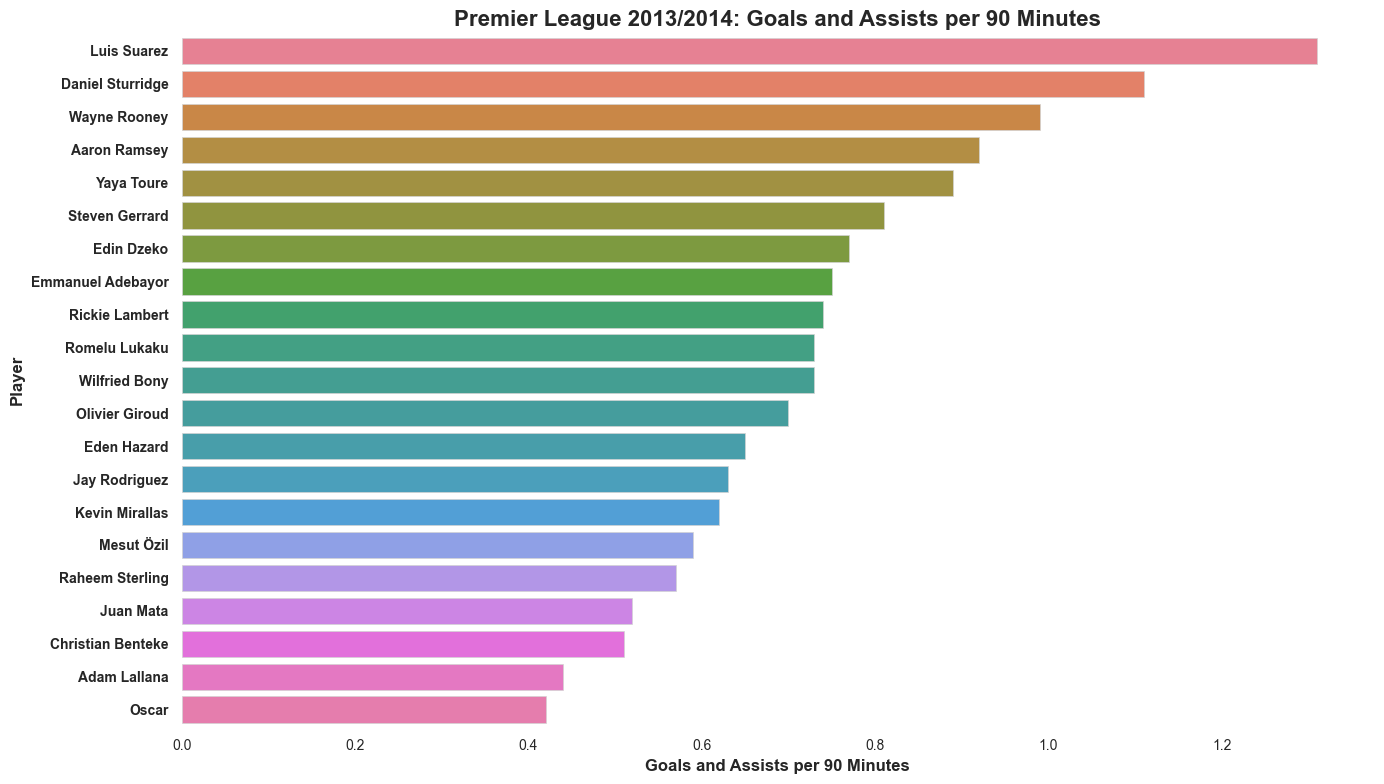

In [35]:
#Who are the top 3 players in terms of Goals + Assists per 90? 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #added to create a dataframe for testing.

# Set style for better visuals
sns.set_theme(style="white") #Change theme.

# Plot Goals + Assists per 90
plt.figure(figsize=(14, 8)) #increase figure size.
df_sorted = df.sort_values('Goals + Assists per 90', ascending=False)
palette = sns.color_palette("viridis", len(df_sorted)) #create color palette.
sns.barplot(x='Goals + Assists per 90', y='Player', data=df_sorted, hue='Player', edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.title('Premier League 2013/2014: Goals and Assists per 90 Minutes', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Goals and Assists per 90 Minutes', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

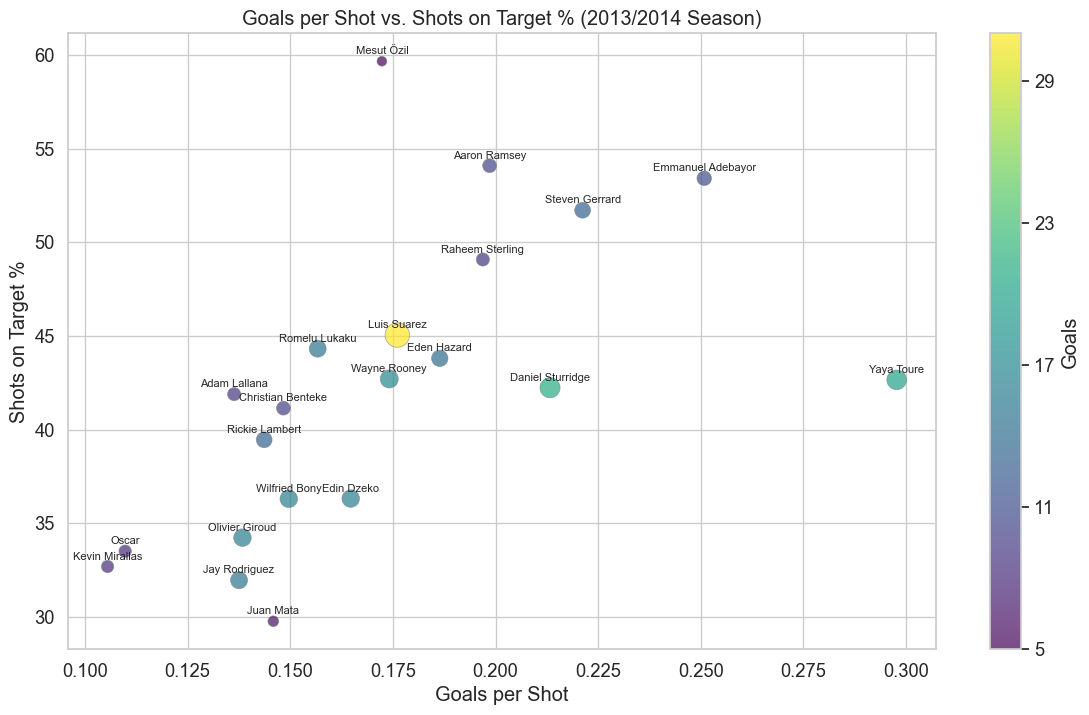

In [36]:
#Question: Which players are in the top-right quadrant (high Goals per Shot and high Shots on Target %)? 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and context for the plot
sns.set_style("whitegrid")  # Light grid background
sns.set_context("notebook", font_scale=1.2)  # Increase font size

# Create the figure
plt.figure(figsize=(14, 8))

# Jittering the data points
jitter_x = np.random.normal(0, 0.005, len(df))  # Adjust the standard deviation for more/less jitter
jitter_y = np.random.normal(0, 0.5, len(df))  # Adjust the standard deviation for more/less jitter

# Scatter plot with jittered points, adjusted size, and transparency
scatter = plt.scatter(df['Goals per Shot'] + jitter_x, df['Shots on Target %'] + jitter_y,
                    s=df['Goals'] * 10,  # Adjust the scaling factor for point size
                    c=df['Goals'], cmap='viridis', alpha=0.7,  # Adjust alpha for transparency
                    edgecolors='gray', linewidths=0.5)

# Annotate points with player names
for i, row in df.iterrows():
    plt.annotate(row['Player'], (row['Goals per Shot'] + jitter_x[i], row['Shots on Target %'] + jitter_y[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Color bar for 'Goals'
plt.colorbar(scatter, label='Goals', ticks=np.arange(df['Goals'].min(), df['Goals'].max() + 6, 6))

plt.title('Goals per Shot vs. Shots on Target % (2013/2014 Season)')
plt.xlabel('Goals per Shot')
plt.ylabel('Shots on Target %')

sns.set_style("whitegrid")  # Set the style
plt.show()


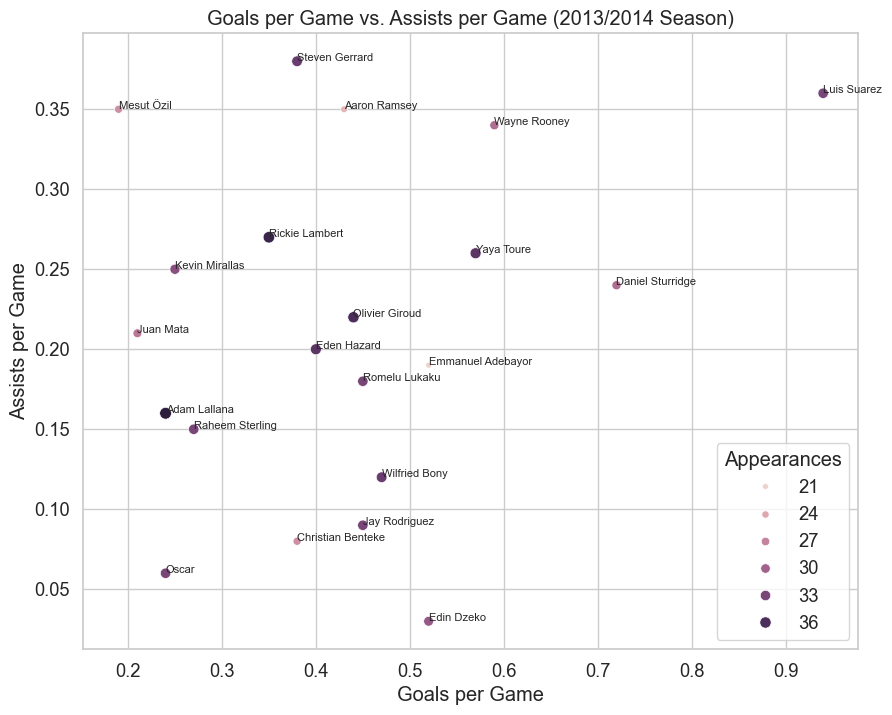

In [37]:
#Which players contribute most frequently (high Goals per Game and/or Assists per Game)? Are there players with high contributions but fewer appearances?
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Goals per Game', y='Assists per Game', size='Appearances', hue='Appearances', data=df)
for i, player in enumerate(df['Player']):
    plt.text(df['Goals per Game'].iloc[i], df['Assists per Game'].iloc[i], player, fontsize=8)
plt.title('Goals per Game vs. Assists per Game (2013/2014 Season)')
plt.xlabel('Goals per Game')
plt.ylabel('Assists per Game')
plt.show()

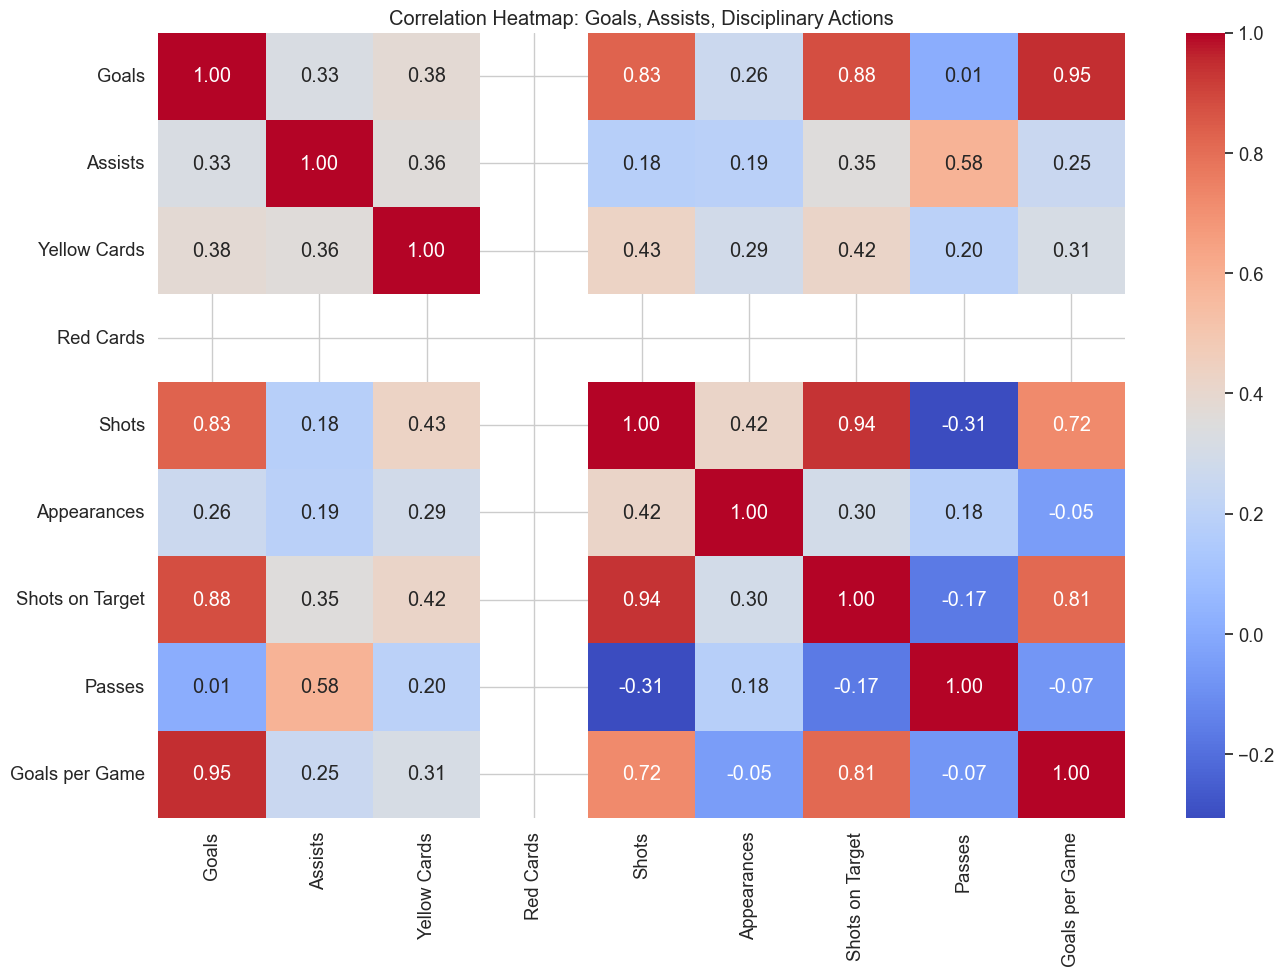

In [38]:
#  Are there any patterns in the distribution of goals, assists, or disciplinary actions?
plt.figure(figsize=(14, 10))
correlation_matrix = df[['Goals', 'Assists', 'Yellow Cards', 'Red Cards', 'Shots', 'Appearances','Shots on Target', 'Passes', 'Goals per Game']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Goals, Assists, Disciplinary Actions')
plt.tight_layout()
plt.show()

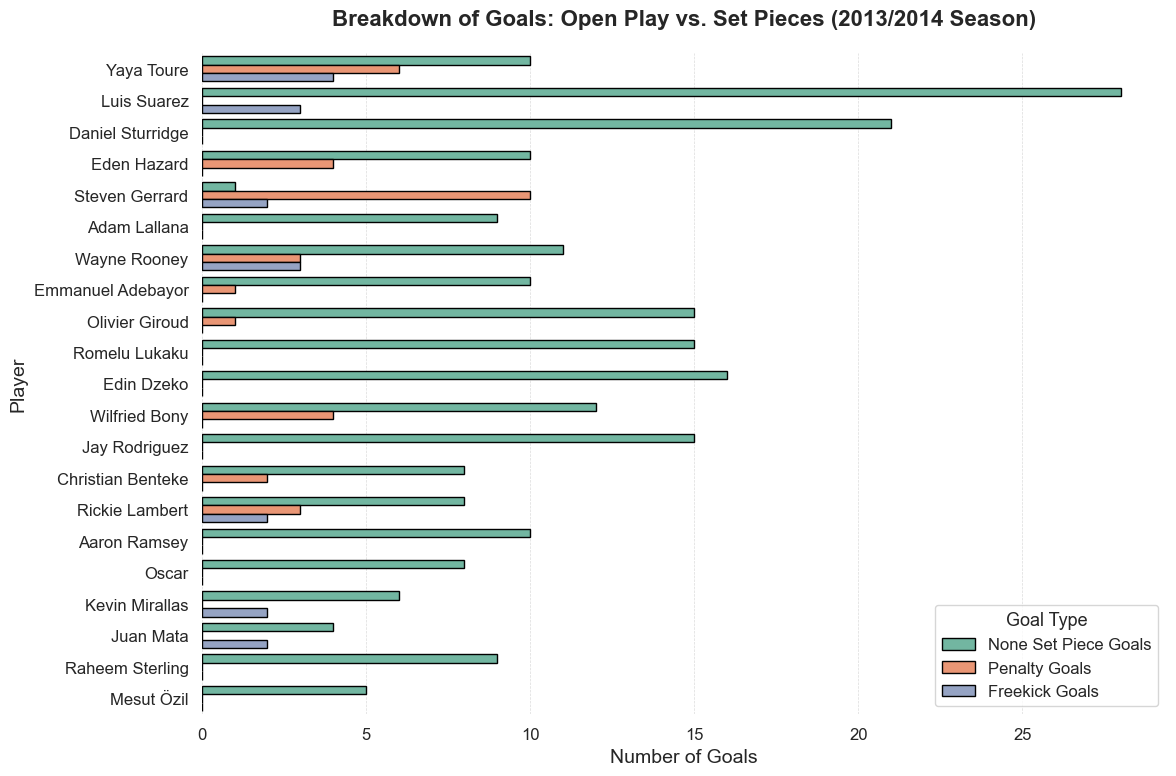

In [39]:
#Which players scored the most set-piece goals (Penalty Goals + Freekick Goals)?
plt.figure(figsize=(12, 8))

# Melt the DataFrame for better visualization
df_melted = df[['Player', 'None Set Piece Goals', 'Penalty Goals', 'Freekick Goals']].melt(id_vars='Player', 
                                                                                          var_name='Goal Type', 
                                                                                          value_name='Goals')

# Use a more appealing color palette and improve bar thickness
sns.barplot(x='Goals', y='Player', hue='Goal Type', data=df_melted, palette='Set2', linewidth=1, edgecolor='black')

# Enhance the title and axis labels
plt.title('Breakdown of Goals: Open Play vs. Set Pieces (2013/2014 Season)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Number of Goals', fontsize=14)
plt.ylabel('Player', fontsize=14)

# Improve legend positioning and labels
plt.legend(title='Goal Type', fontsize=12, title_fontsize=13, loc='lower right')

# Clean up grid and remove spines for a modern look
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine(left=True, bottom=True)

# Adjust tick labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



Player with the Highest Average Rank (Most Well-Rounded):
Player                                    Luis Suarez
Goals                                             1.0
Assists                                           2.0
Appearances                                      10.0
Minutes Played                                    3.0
Yellow Cards                                     18.5
Red Cards                                        11.0
Shots                                             1.0
Shots on Target                                   1.0
Penalty Goals                                    15.5
Freekick Goals                                    2.5
Passes                                            9.0
Goals per 90                                      1.0
Assists per 90                                    5.0
Goals + Assists per 90                            1.0
Goals per Shot                                    9.0
Shots on Target %                                 6.0
Passes per 90          

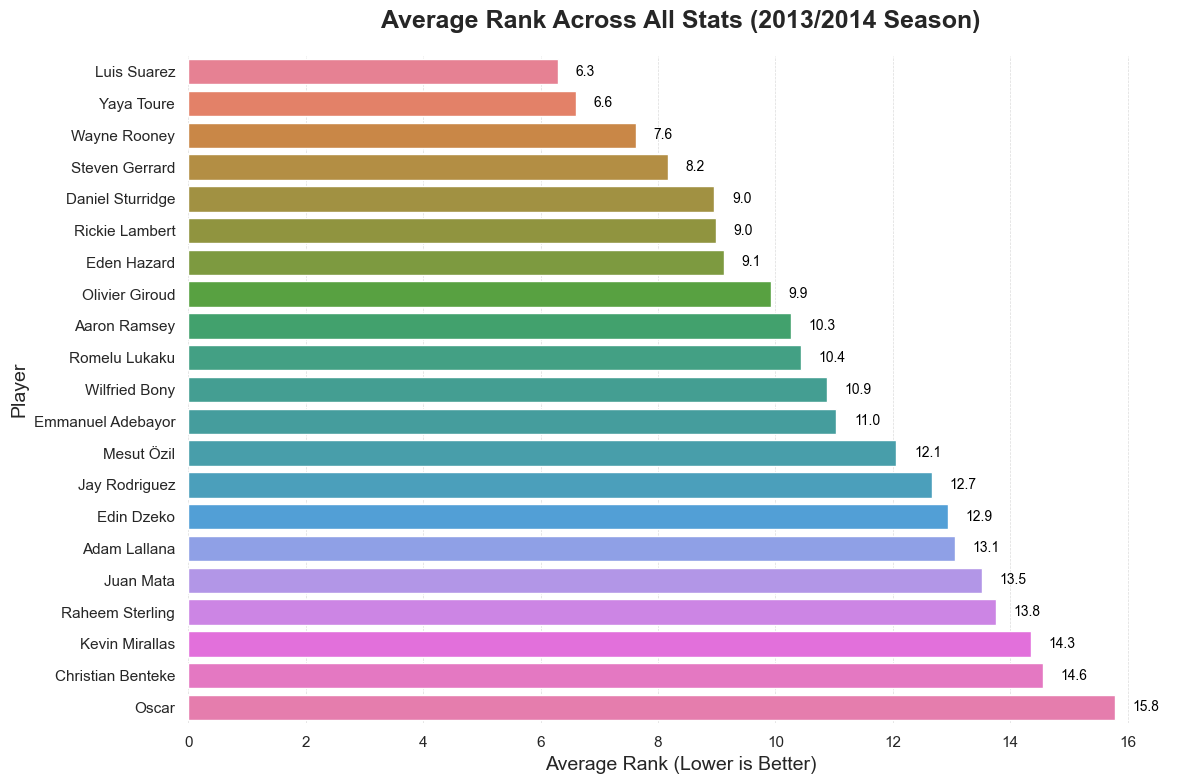

In [50]:
# Define stats to rank (all available and derived stats)
all_stats = available_stats_list + derived_stats_list

# Identify negative stats (lower is better)
negative_stats = ['Yellow Cards', 'Red Cards', 'Yellow Cards per 90', 'Red Cards per 90'] 

# Create a DataFrame for ranks
df_ranks = df[all_stats].rank(ascending=False)  # Default is descending (higher value = lower rank)

# Invert ranks for negative stats (lower value = lower rank)
for stat in negative_stats:
    if stat in df_ranks.columns:
        df_ranks[stat] = df[stat].rank(ascending=True)  # Ascending for negative stats
# Calculate average rank for each player
df_ranks['Average Rank'] = df_ranks.mean(axis=1)

# Sort by average rank to find the player with the highest overall rank
df_ranks = df_ranks.sort_values('Average Rank')
df_ranks = df_ranks.round({'Average Rank': 2})  # Round to 2 decimal places for readability

# Merge ranks back with original DataFrame for context
df_with_ranks = pd.concat([df[['Player']], df_ranks], axis=1)


# Highlight the player with the highest average rank
best_player = df_with_ranks.loc[df_with_ranks['Average Rank'].idxmin()]
print("\nPlayer with the Highest Average Rank (Most Well-Rounded):")
print(best_player)

# Optional: Visualize average ranks
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean, minimal style
sns.set(style="whitegrid")

# Sort data by rank (ascending for better rank visibility)
df_with_ranks = df_with_ranks.sort_values('Average Rank', ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Custom bar plot with gradient color palette
colors = sns.color_palette("viridis", len(df_with_ranks))
sns.barplot(x='Average Rank', y='Player', data=df_with_ranks, hue='Player')

# Add value labels on the bars
for index, value in enumerate(df_with_ranks['Average Rank']):
    plt.text(value + 0.3, index, f'{value:.1f}', color='black', ha='left', va='center', fontsize=10)

# Add a title and axis labels with better styling
plt.title('Average Rank Across All Stats (2013/2014 Season)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Average Rank (Lower is Better)', fontsize=14)
plt.ylabel('Player', fontsize=14)

# Improve axis limits and grid appearance
plt.xlim(0, df_with_ranks['Average Rank'].max() + 1)  # Dynamic axis limit
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


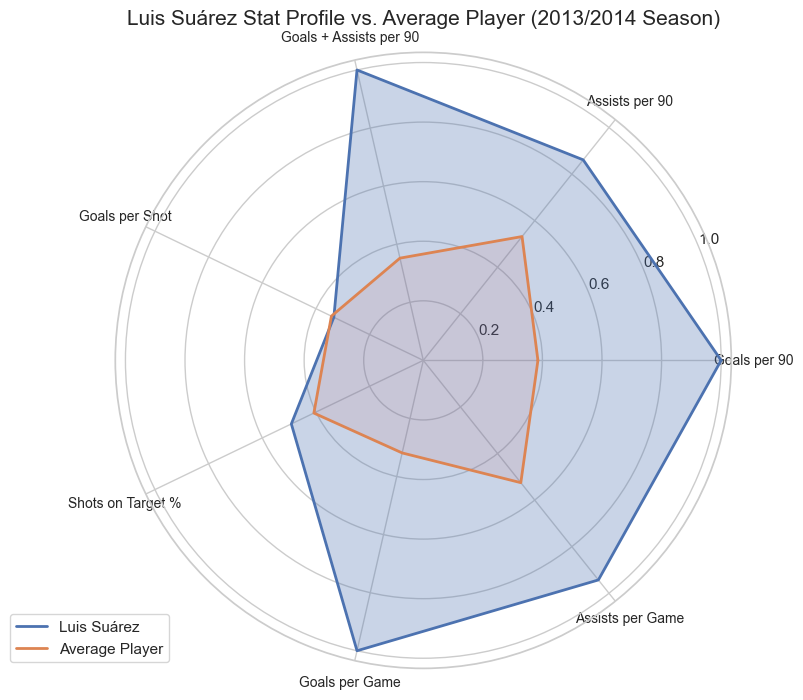

Top 5 Players (Excluding Luis Suárez): ['Yaya Toure', 'Wayne Rooney', 'Steven Gerrard', 'Daniel Sturridge', 'Rickie Lambert']


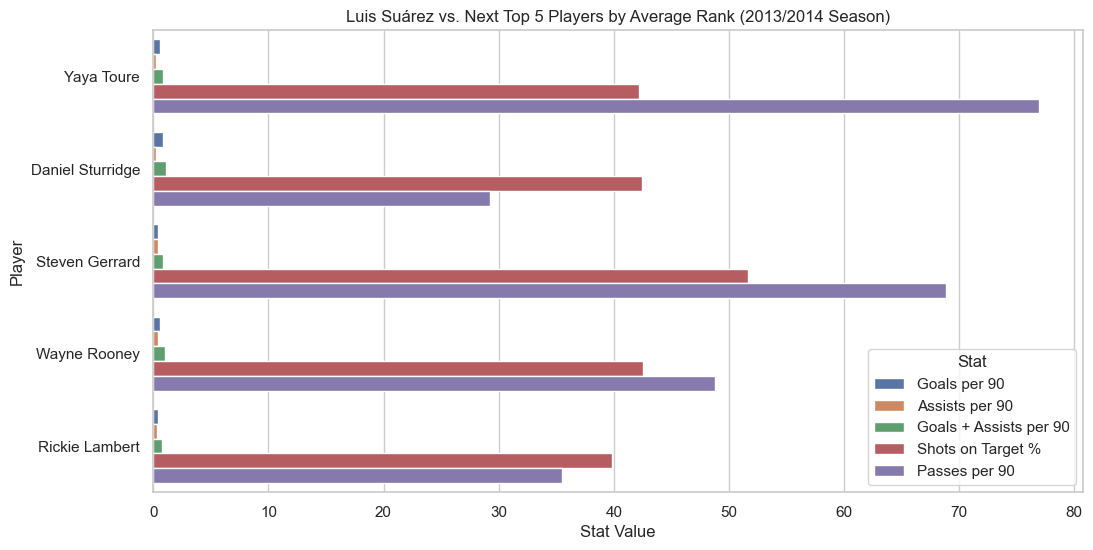

In [49]:
#Suarez was the best player. 
#Visualization of his stats
key_stats = ['Goals per 90', 'Assists per 90', 'Goals + Assists per 90', 'Goals per Shot', 
             'Shots on Target %', 'Goals per Game', 'Assists per Game']

# Visualization 1: Radar Chart (Suárez vs. Average Player)
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Normalize the key stats to a 0-1 scale for the radar chart
df_normalized = df[key_stats].copy()
for stat in key_stats:
    df_normalized[stat] = (df[stat] - df[stat].min()) / (df[stat].max() - df[stat].min())

# Get Suárez's normalized stats and the average player's stats
suarez_stats = df_normalized[df['Player'] == 'Luis Suarez'].iloc[0]
average_stats = df_normalized.mean()

# Prepare data for radar chart
categories = key_stats
N = len(categories)

# Compute angle for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Suárez's stats
suarez_values = suarez_stats.values.tolist()
suarez_values += suarez_values[:1]  # Complete the loop
ax.plot(angles, suarez_values, linewidth=2, linestyle='solid', label='Luis Suárez')
ax.fill(angles, suarez_values, 'b', alpha=0.3)

# Average player's stats
average_values = average_stats.values.tolist()
average_values += average_values[:1]  # Complete the loop
ax.plot(angles, average_values, linewidth=2, linestyle='solid', label='Average Player')
ax.fill(angles, average_values, 'r', alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("Luis Suárez Stat Profile vs. Average Player (2013/2014 Season)", size=15, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# Visualization 2: Bar Plot Comparison (Suárez vs. Top 5 Players)
# Get the top 5 players by average rank without Suarez 
df_without_suarez = df_with_ranks[df_with_ranks['Player'] != 'Luis Suarez']
top_5_players = df_without_suarez.nsmallest(5, 'Average Rank')['Player'].tolist()  # Ranks 2-6

# Verify the new top 5
print("Top 5 Players (Excluding Luis Suárez):", top_5_players)

# Visualization 2: Bar Plot Comparison (Suárez vs. Top 5 Players, excluding Suárez from top 5)
# Include Suárez in the comparison, but ensure top_5_players doesn't include him
comparison_players = top_5_players
df_comparison = df[df['Player'].isin(comparison_players)]

# Select a subset of stats for comparison
comparison_stats = ['Goals per 90', 'Assists per 90', 'Goals + Assists per 90', 'Shots on Target %', 'Passes per 90']

# Melt the DataFrame for easier plotting
df_melted = df_comparison[['Player'] + comparison_stats].melt(id_vars='Player', 
                                                              var_name='Stat', 
                                                              value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Value', y='Player', hue='Stat', data=df_melted)
plt.title('Luis Suárez vs. Next Top 5 Players by Average Rank (2013/2014 Season)')
plt.xlabel('Stat Value')
plt.ylabel('Player')
plt.legend(title='Stat')
plt.show()